# Numba JIT

In [1]:
from numba import jit
import math

@jit
def hypot(x, y):
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

In [2]:
hypot(3.0, 4.0)

5.0

In [3]:
hypot.py_func(3.0, 4.0)

5.0

In [5]:
%timeit hypot.py_func(3.0, 4.0)

1.94 µs ± 675 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%timeit hypot(3.0, 4.0)

403 ns ± 58.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%timeit math.hypot(3.0, 4.0)

291 ns ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
@jit(nopython=True)
def ones_and_twos(nsamples):
    array = []
    for i in range(nsamples):
        if(i%2==0):
            array.append(1)
        else:
            array.append(2)
    return array

In [16]:
ones_and_twos(100_000)

[1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,


In [17]:
%timeit ones_and_twos(100_000)

2.79 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit ones_and_twos.py_func(100_000)

24.7 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
from numba import prange, jit
import numpy as np

@jit(parallel=True, nogil=True)
def ones_and_twos_parallel(nsamples):
    array = np.empty(nsamples, dtype='int')
    for i in prange(nsamples):
        if(i%2==0):
            array[i] = 1
        else:
            array[i] = 2
    return array

In [20]:
%timeit ones_and_twos_parallel(100_000)

114 µs ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Zbir elemenata dva niza A i B

In [21]:
import numpy as np
from numba import njit

A = np.arange(0, 1000, 0.01)
B = np.arange(0, 2000, 0.02)

def python_loop(a,b):
    result = 0.0
    for i,j in zip(a,b):
        result += (i+j)
    return result

In [22]:
@jit(nopython=True)
def numba_loop_zip(a,b):
    result = 0.0
    for i,j in zip(a,b):
            result += (i+j)
    return result

In [23]:
%timeit python_loop(A,B)

94.2 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit numba_loop_zip(A,B)

150 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Tipizirani ulaz

In [25]:
@jit('float64(float64[:],float64[:])')
def numba_zip_float64(a,b):
    result = 0.0
    for i,j in zip(a,b):
            result += (i+j)
    return result

In [28]:
%timeit numba_zip_float64(A,B)

179 µs ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
A_32 = np.arange(0, 1000, 0.01, dtype='float32')
B_32 = np.arange(0, 2000, 0.02, dtype='float32')

@jit('float32(float32[:],float32[:])')
def numba_zip_float32(a,b):
    result = np.float32(0.0)
    for i,j in zip(a,b):
            result += (i+j)
    return result

In [30]:
%timeit numba_zip_float32(A_32,B_32)

174 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### fastmath

In [31]:
from numba import njit, prange

@njit(fastmath=True)
def numba_loop_zip_fastmath(a,b):
    result = 0.0
    for i,j in zip(a,b):
            result += (i+j)
    return result

In [34]:
%timeit numba_loop_zip_fastmath(A,B)

194 µs ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
@njit(fastmath=True)
def numba_loop_fastmath_single(a,b):
    result = 0.0
    size=min(a.shape[0],b.shape[0])
    for i in range(size):
            result += a[i]+b[i]
    return result

@njit(fastmath=True,parallel=True)
def numba_loop_fastmath_multi(a,b):
    result = 0.0
    size=min(a.shape[0],b.shape[0])
    for i in prange(size):
            result += a[i]+b[i]
    return result


def numpy_methods(a, b):
    return a.sum() + b.sum()

In [ ]:
!C:\"Program Files"\Python36\python.exe -m pip install simple_benchmark

<IPython.core.display.Javascript object>


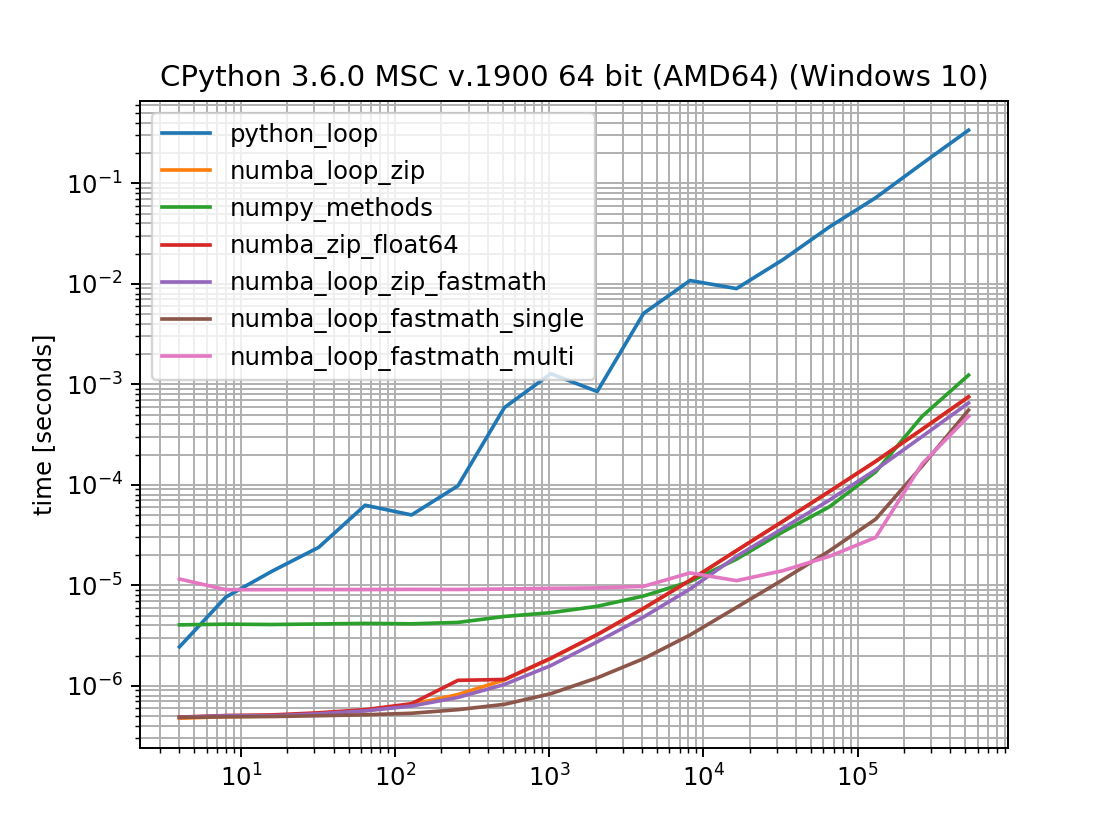

In [33]:
from simple_benchmark import benchmark, MultiArgument

arguments = {
    2**i: MultiArgument([np.zeros(2**i), np.zeros(2**i)])
    for i in range(2, 20)
}
b = benchmark([python_loop, numba_loop_zip, numpy_methods,numba_zip_float64,numba_loop_zip_fastmath,numba_loop_fastmath_single,numba_loop_fastmath_multi], 
              arguments, 
              warmups=[python_loop, numba_loop_zip, numpy_methods,numba_zip_float64,numba_loop_zip_fastmath,numba_loop_fastmath_single,numba_loop_fastmath_multi])

%matplotlib notebook
b.plot()